In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC

In [158]:
def load_dataset(filename):
	data = pd.read_csv(filename, header=None)
	dataset = data.values
	X = dataset[:, 1:]
	y = dataset[:,0]
	X = X.astype(str)
	return X, y

def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

def select_features_chi2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features_mut_info(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [159]:
X, y = load_dataset('./data/agaricus-lepiota.data')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Feature:                cap-shape 0.03331314676160013
Feature:              cap-surface 0.01651427733303734
Feature:                cap-color 0.03068397109038523
Feature:                 bruises? 0.1357482385917188
Feature:                     odor 0.630976350978574
Feature:          gill-attachment 0.0026524621483314803
Feature:             gill-spacing 0.06827362636906775
Feature:                gill-size 0.15499380320066414
Feature:               gill-color 0.2812961661459321
Feature:              stalk-shape 0.0008303239253009131
Feature:               stalk-root 0.09798954489508538
Feature: stalk-surface-above-ring 0.19826205981862355
Feature: stalk-surface-below-ring 0.19284428688229638
Feature:   stalk-color-above-ring 0.16223521926093443
Feature:   stalk-color-below-ring 0.16495502410780793
Feature:                veil-type 0.004870701925673071
Feature:               veil-color 0.01620202557520778
Feature:              ring-number 0.018465214713061284
Feature:                ri

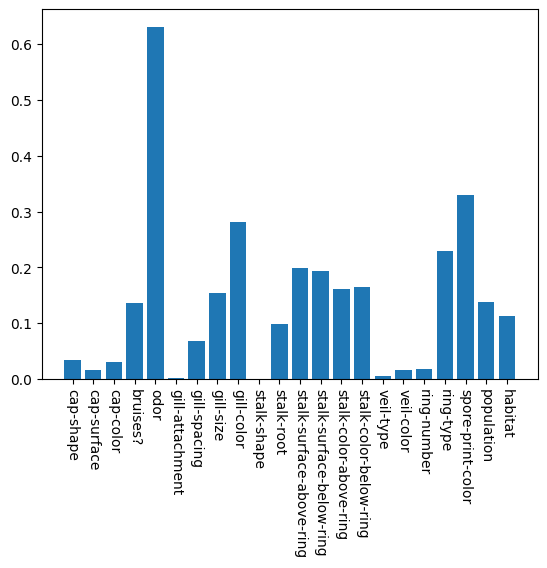

In [160]:
X_train_fs, X_test_fs, fs = select_features_mut_info(X_train_enc, y_train_enc, X_test_enc)

for i in range(len(fs.scores_)):
	print('Feature: {:>24} {:>12}'.format(X[0][i], fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(X[0].size), X[0], rotation=-90)
plt.show()

Feature:                cap-shape 23.41325691742819
Feature:              cap-surface 101.6174049358153
Feature:                cap-color 10.00273923158332
Feature:                 bruises? 234.923782706103
Feature:                     odor 3.837129636988325
Feature:          gill-attachment 3.538766133426887
Feature:             gill-spacing 1104.903839214167
Feature:                gill-size 2139.6749150824944
Feature:               gill-color 4513.3109026278435
Feature:              stalk-shape 45.16980540853761
Feature:               stalk-root 793.2164200659337
Feature: stalk-surface-above-ring 160.80147365337342
Feature: stalk-surface-below-ring 155.78645075311658
Feature:   stalk-color-above-ring 128.5876362934278
Feature:   stalk-color-below-ring 125.02526725196864
Feature:                veil-type 5441.999999999999
Feature:               veil-color 6.806373380807866
Feature:              ring-number 59.80062862624814
Feature:                ring-type 1316.520819918042
Feature:

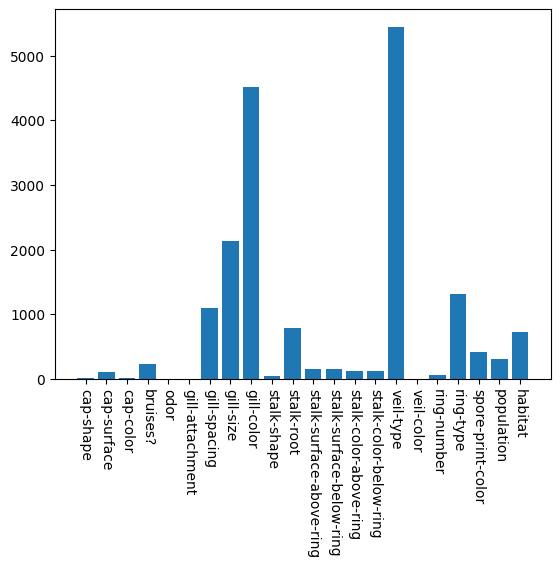

In [165]:
X_train_fs, X_test_fs, fs = select_features_chi2(X_train_enc, y_train_enc, X_test_enc)

for i in range(len(fs.scores_)):
	print('Feature: {:>24} {:>12}'.format(X[0][i], fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(X[0].size), X[0], rotation=-90)
plt.show()

In [178]:
from sklearn import preprocessing
X_train_scale, X_test_scale = prepare_inputs(X, X)
data_scaled = pd.DataFrame(preprocessing.scale(X_train_scale), columns = X[0]) 

# PCA
pca = PCA(n_components=2)
# pca = PCA(.95)
x = pca.fit_transform(data_scaled)

# Dump components relations with features:
print(pd.DataFrame(pca.components_, columns = data_scaled.columns, index = ['PC-1', 'PC-2']))

      cap-shape  cap-surface  cap-color  bruises?      odor  gill-attachment  \
PC-1   0.022206     0.103070  -0.177019 -0.304503  0.271958         0.057818   
PC-2  -0.008840     0.172198  -0.207359  0.103279  0.068285        -0.266191   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
PC-1      0.026471   0.377166   -0.379484     0.206447  ...   
PC-2     -0.501332   0.070565   -0.021236    -0.014626  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
PC-1                 -0.144670                0.091715   
PC-2                  0.160967               -0.289227   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
PC-1                0.085697  -0.000056    0.053947     0.017803  -0.410077   
PC-2               -0.283379  -0.020547   -0.260280    -0.091246   0.145608   

      spore-print-color  population   habitat  
PC-1           0.394060   -0.003275  0.122734  
PC-2           0.071416    0.344605  0.046155  

[2 rows x 2

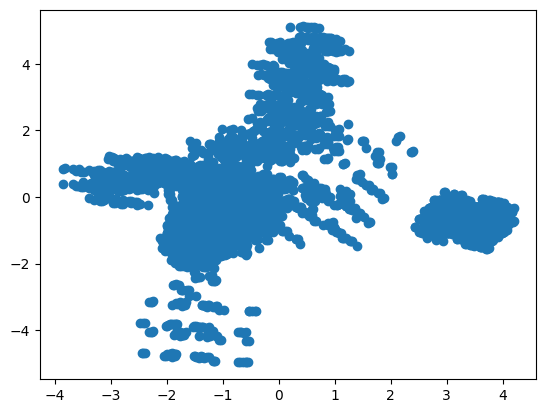

In [172]:
plt.scatter(x[:,0], x[:,1])

(3, 22)
(5443, 3)


NameError: name 'randrange' is not defined

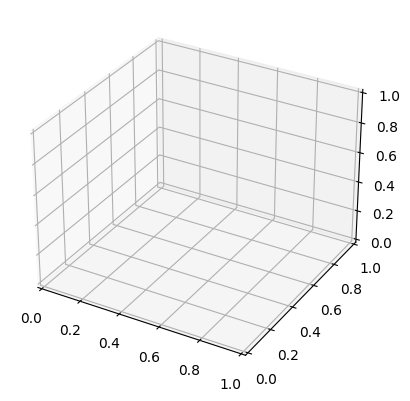

In [163]:
pca = PCA(n_components=3)

pca.fit(X_train_enc)
svm = SVC()
pipe = Pipeline([('reduce_dim', pca), ('clf', svm)])
pipe.fit(X_train_enc, y_train_enc)

print(pca.components_.shape)
print(pca.transform(X_train_enc).shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

plt.show()